In [1]:
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
plt.rcParams['font.family'] = 'serif'

In [4]:
from scipy import interpolate
from scipy.linalg import expm, logm

In [5]:
def generate_latent_splines(t, r):
    """
    Generate r random splines with t time points each.
    """
    n_knots = 10
    splines = np.zeros((t, r))
    for i in range(r):
        x = np.arange(0, n_knots, 1) + np.random.uniform(-0.5, 0.5, n_knots)
        x = (x - np.min(x)) / (np.max(x) - np.min(x))
        y = np.random.uniform(-1, 1, n_knots)
        s = interpolate.InterpolatedUnivariateSpline(x, y, k=3)
        xnew = np.linspace(0, 1, t)
        splines[:, i] = s(xnew)
    return splines

In [6]:
def create_symmetric_matrix(upper, dim=5):
    """
    Create a symmetric matrix with elements in the upper triangle.
    
    Args
        upper: (numpy array) vector with concatenated rows in the upper triangle
        dim: (int) square matrix dimension
    """
    mat = np.zeros((dim, dim))
    current = 0
    for i in range(dim):  # fill in the upper triangle
        end = current + dim - i
        mat[i, i:] = upper[current:end]
        current = end
    for i in range(1, dim):  # fill in the lower triangle
        for j in range(i):
            mat[i, j] = mat[j, i]
    return mat

In [7]:
def create_covariance_series(log_covariance, d):
    """
    Create a series of d x d covariance matrices based on the log-covariance.
    """
    t, q = log_covariance.shape
    cov_series = np.zeros((t, d, d))
    for i in range(t):
        cov_series[i, :, :] = expm(create_symmetric_matrix(log_covariance[i, :], d))
    return cov_series

In [8]:
def sample_time_series(covariance_series):
    """
    Sample time series data given the covariance matrices.
    """
    t, d, _ = covariance_series.shape
    time_series = np.zeros((t, d))
    mu = np.zeros(d)
    for i in range(t):
        time_series[i, :] = np.random.multivariate_normal(mu, covariance_series[i, :, :], 1)
    return time_series

## Simulation data with latent splines

In [19]:
F = generate_latent_splines(1000, 2)
print(F.shape)

(1000, 2)


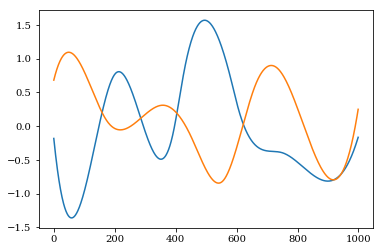

In [20]:
for j in range(2):
    plt.plot(F[:, j])
plt.show()

In [21]:
loading = np.random.normal(0, 1, [2, 15])
log_covariance = np.matmul(F, loading)
print(log_covariance.shape)

(1000, 15)


In [22]:
cov_series = create_covariance_series(log_covariance, 5)
print(cov_series.shape)

(1000, 5, 5)


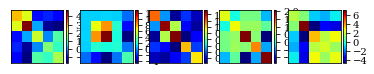

In [23]:
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(cov_series[i * 200, :, :], cmap='jet')
    plt.xticks([])
    plt.yticks([])
    plt.colorbar(fraction=0.046, pad=0.04)
plt.show()

In [24]:
ts = sample_time_series(cov_series)
print(ts.shape)

(1000, 5)


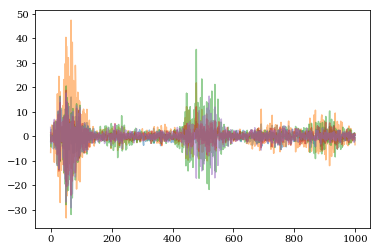

In [25]:
for j in range(5):
    plt.plot(ts[:, j], alpha=0.5)
plt.show()